In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [2]:
newsgroup = fetch_20newsgroups(subset='all')

print(newsgroup.target_names) 

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(newsgroup.data, newsgroup.target, test_size=0.2, random_state=42)

In [4]:
# Creamos un vectorizador y un clasificador Naive Bayes
vectorizer = CountVectorizer(stop_words='english', max_features=10000)
clf = MultinomialNB()

# Creamos un pipeline que incluya el vectorizador y el clasificador
pipeline1 = Pipeline([
    ('vect', vectorizer),
    ('clf', clf)
])

# Entrenamos el modelo
pipeline1.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=10000, stop_words='english')),
                ('clf', MultinomialNB())])

In [5]:
# Comprobar los resultados con los datos de prueba
predictions1 = pipeline1.predict(X_test)
print("Accuracy 1:", accuracy_score(y_test, predictions1))
print(classification_report(y_test, predictions1))


Accuracy 1: 0.8440318302387267
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       151
           1       0.65      0.86      0.74       202
           2       0.81      0.11      0.20       195
           3       0.54      0.82      0.65       183
           4       0.76      0.89      0.82       205
           5       0.78      0.81      0.79       215
           6       0.82      0.76      0.79       193
           7       0.86      0.94      0.90       196
           8       0.88      0.92      0.90       168
           9       0.97      0.93      0.95       211
          10       0.96      0.96      0.96       198
          11       0.96      0.94      0.95       201
          12       0.86      0.82      0.84       202
          13       0.96      0.89      0.92       194
          14       0.92      0.95      0.94       189
          15       0.92      0.96      0.94       202
          16       0.89      0.92      0.91       

In [6]:
pipeline2 = Pipeline([
    ('vect', vectorizer),
    ('clf', LogisticRegression())
])

pipeline2.fit(X_train, y_train)

c:\Users\Acer\anaconda3\envs\pln\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect',
                 CountVectorizer(max_features=10000, stop_words='english')),
                ('clf', LogisticRegression())])

In [7]:
predictions2 = pipeline2.predict(X_test)
print("Accuracy 2:", accuracy_score(y_test, predictions2))
print(classification_report(y_test, predictions2))

Accuracy 2: 0.8732095490716181
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       151
           1       0.75      0.80      0.78       202
           2       0.85      0.79      0.82       195
           3       0.65      0.69      0.67       183
           4       0.82      0.80      0.81       205
           5       0.86      0.82      0.84       215
           6       0.81      0.82      0.81       193
           7       0.90      0.91      0.90       196
           8       0.94      0.92      0.93       168
           9       0.94      0.95      0.94       211
          10       0.95      0.96      0.96       198
          11       0.98      0.93      0.95       201
          12       0.81      0.81      0.81       202
          13       0.90      0.94      0.92       194
          14       0.94      0.93      0.93       189
          15       0.89      0.97      0.93       202
          16       0.93      0.93      0.93       

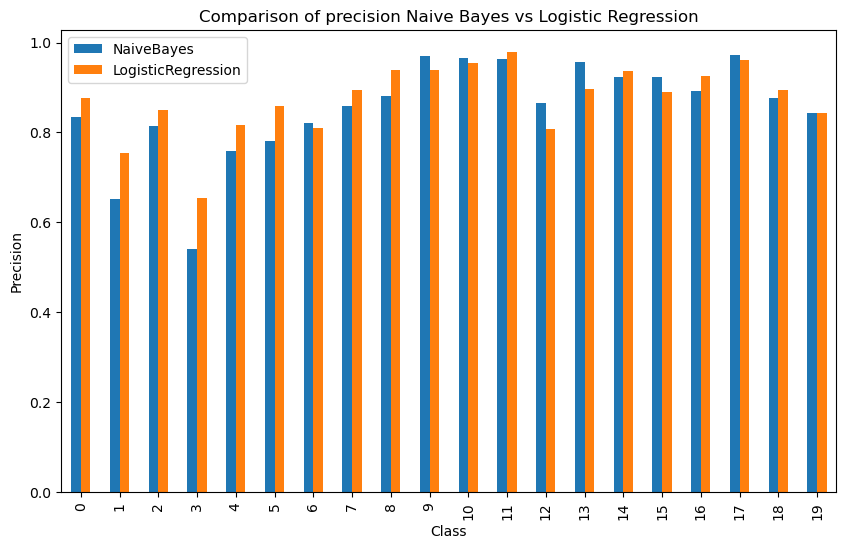

In [8]:
import matplotlib.pyplot as plt

report1 = classification_report(y_test, predictions1, output_dict=True)
report2 = classification_report(y_test, predictions2, output_dict=True)

# Convertir el informe a un DataFrame de pandas
df_report = pd.DataFrame(report1).transpose()
df_report2 = pd.DataFrame(report2).transpose()

# Seleccionar solo las clases (y no los promedios globales como 'accuracy', 'macro avg', etc.)
df_report = df_report.drop(['accuracy', 'macro avg', 'weighted avg'])
df_report2 = df_report2.drop(['accuracy', 'macro avg', 'weighted avg'])

x1 = df_report[['precision']]
x2 = df_report2[['precision']]
x = pd.concat([x1, x2], axis=1)
x.columns = ['NaiveBayes', 'LogisticRegression']

# Graficar
x.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Precision')
plt.xlabel('Class')
plt.title('Comparison of precision Naive Bayes vs Logistic Regression')
plt.show()


In [9]:
pipeline3 = Pipeline([
    ('vect', vectorizer),
    ('clf', SVC())
])

pipeline3.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=10000, stop_words='english')),
                ('clf', SVC())])

In [10]:
predictions3 = pipeline3.predict(X_test)
print("Accuracy 3:", accuracy_score(y_test, predictions3))
print(classification_report(y_test, predictions3))

Accuracy 3: 0.3092838196286472
              precision    recall  f1-score   support

           0       0.77      0.13      0.23       151
           1       0.82      0.13      0.23       202
           2       0.88      0.34      0.49       195
           3       0.54      0.30      0.39       183
           4       0.96      0.11      0.20       205
           5       0.93      0.25      0.39       215
           6       0.27      0.73      0.39       193
           7       0.86      0.18      0.30       196
           8       0.08      0.96      0.14       168
           9       0.81      0.30      0.44       211
          10       0.96      0.37      0.53       198
          11       0.96      0.32      0.48       201
          12       0.37      0.23      0.28       202
          13       0.88      0.22      0.35       194
          14       0.98      0.27      0.42       189
          15       0.72      0.44      0.54       202
          16       0.79      0.30      0.44       

In [11]:
pipeline4 = Pipeline([
    ('vect', vectorizer),
    ('clf', LinearSVC())
])

pipeline4.fit(X_train, y_train)

c:\Users\Acer\anaconda3\envs\pln\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('vect',
                 CountVectorizer(max_features=10000, stop_words='english')),
                ('clf', LinearSVC())])

In [12]:
predictions4 = pipeline4.predict(X_test)
print("Accuracy 4:", accuracy_score(y_test, predictions4))
print(classification_report(y_test, predictions4))

Accuracy 4: 0.8623342175066313
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       151
           1       0.75      0.77      0.76       202
           2       0.82      0.77      0.79       195
           3       0.62      0.69      0.65       183
           4       0.83      0.81      0.82       205
           5       0.84      0.83      0.84       215
           6       0.79      0.78      0.79       193
           7       0.87      0.89      0.88       196
           8       0.95      0.94      0.94       168
           9       0.93      0.93      0.93       211
          10       0.97      0.96      0.97       198
          11       0.96      0.95      0.96       201
          12       0.81      0.76      0.78       202
          13       0.85      0.91      0.88       194
          14       0.93      0.94      0.93       189
          15       0.90      0.95      0.92       202
          16       0.88      0.91      0.90       

In [13]:
pipeline5 = Pipeline([
    ('vect', vectorizer),
    ('clf', RandomForestClassifier())
])

pipeline5.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=10000, stop_words='english')),
                ('clf', RandomForestClassifier())])

In [14]:
predictions5 = pipeline5.predict(X_test)
print("Accuracy 5:", accuracy_score(y_test, predictions5))
print(classification_report(y_test, predictions5))

Accuracy 5: 0.8387267904509284
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       151
           1       0.68      0.76      0.72       202
           2       0.74      0.88      0.80       195
           3       0.65      0.67      0.66       183
           4       0.86      0.79      0.82       205
           5       0.91      0.76      0.83       215
           6       0.81      0.77      0.79       193
           7       0.83      0.85      0.84       196
           8       0.92      0.93      0.93       168
           9       0.90      0.93      0.91       211
          10       0.90      0.95      0.93       198
          11       0.94      0.91      0.92       201
          12       0.74      0.68      0.71       202
          13       0.86      0.88      0.87       194
          14       0.86      0.94      0.90       189
          15       0.84      0.97      0.90       202
          16       0.82      0.90      0.86       